In [0]:
import numpy as np
import matplotlib.pyplot as plt

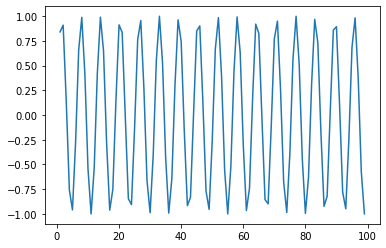

In [4]:
plt.plot(np.arange(1,100, 1), np.sin(np.arange(1,100,1)))

In [5]:
!git add -A

fatal: not a git repository (or any of the parent directories): .git
